# Presence of fringes in MIRI MRS spectra?  
Let's look at the spectra extracted from different MIRI optical stimuli.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
import funcs
import mrsobs

import numpy as  np
from matplotlib import pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

We load the images for one band of the MRS for different kinds of sources, including:  
* MTS 800K BB extended source
* MIRI 800K BB internal calibration source
* MTS 800K BB extended source observed through etalon "ET1A"
* MTS 800K BB extended source observed through 100micron pinhole
* OTIS 800K BB ASPA source (semi-extended)

We subtract background exposures where available (Contamination Control Cover closed for internal calibration source observations, no background exposures taken).

We extract a detector pixel trace based on different criteria, including as example:  
* slice number and along-slice position (required geometric distortion calibration information for the latter)
* peak signal of compact source in slice which contains the center of the PSF

In [2]:
# Define paths to data
workDir = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir  = workDir+'cdp_data/'
d2cMapDir = workDir+'notebooks/distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'
cv3datapath = workDir+'CV3_data/LVL2/'
otisdatapath = workDir+'OTIS_data/LVL2/'

In [4]:
plt.close('all')
plt.ioff()
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    intcal_source_sci = mrsobs.MIRI_internal_calibration_source(lvl2path,band,campaign='FM')
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_RAD_06_raster(lvl2path,band)
    semiext_source_sci,semiext_source_bkg = mrsobs.OTIS_ASPA_semiextended_source(otisdatapath,band,pointing='v03')
    
    d2cMaps   = funcs.load_obj('d2cMaps_band{}_tr80pc'.format(band),path=d2cMapDir)
    lambdaMap = d2cMaps['lambdaMap']
    nslices   = d2cMaps['nslices']
    
    # perform transform
    point_source_bkgsubtr   = point_source_sci-point_source_bkg
    semiext_source_bkgsubtr = semiext_source_sci-semiext_source_bkg
    
    #-- isoalpha
    ypos,xpos =  funcs.detpixel_trace(band,d2cMaps,sliceID=nslices/2,alpha_pos=0.)
    #-- point source
    ypos_p,xpos_p   = funcs.detpixel_trace_compactsource(point_source_bkgsubtr,band,d2cMaps)
    #-- semi-extended source
    ypos_se,xpos_se = funcs.detpixel_trace_compactsource(semiext_source_bkgsubtr,band,d2cMaps)
    
    plt.figure(figsize=(12,4))
    if band[0] == '1':
        plt.plot(lambdaMap[ypos_se,xpos_se][20:-20],intcal_source_sci[ypos_se,xpos_se][20:-20])
    else:
        plt.plot(lambdaMap[ypos,xpos][20:-20],intcal_source_sci[ypos,xpos][20:-20])
    plt.title('MIRI internal calibration source // Band {}'.format(band))
    plt.xlabel('Wavelength [micron]')
    plt.ylabel('Signal [DN/sec]')
    if  band == '4C':
        plt.hlines(0,lambdaMap[np.nonzero(lambdaMap)].min(),lambdaMap[np.nonzero(lambdaMap)].max(),'k',alpha=0.4,linestyle='dashed')
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavelength.eps'.format(band), format='eps', dpi=100)
plt.ion()

In [57]:
plt.close('all')
plt.ioff()
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    intcal_source_sci = mrsobs.MIRI_internal_calibration_source(lvl2path,band,campaign='FM')
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_RAD_06_raster(lvl2path,band)
    semiext_source_sci,semiext_source_bkg = mrsobs.OTIS_ASPA_semiextended_source(otisdatapath,band,pointing='v03')
    
    d2cMaps   = funcs.load_obj('d2cMaps_band{}_tr80pc'.format(band),path=d2cMapDir)
    lambdaMap = d2cMaps['lambdaMap']
    nslices   = d2cMaps['nslices']
    
    # perform transform
    point_source_bkgsubtr   = point_source_sci-point_source_bkg
    semiext_source_bkgsubtr = semiext_source_sci-semiext_source_bkg
    
    #-- isoalpha
    ypos,xpos =  funcs.detpixel_trace(band,d2cMaps,sliceID=nslices/2,alpha_pos=0.)
    #-- point source
    ypos_p,xpos_p   = funcs.detpixel_trace_compactsource(point_source_bkgsubtr,band,d2cMaps)
    #-- semi-extended source
    ypos_se,xpos_se = funcs.detpixel_trace_compactsource(semiext_source_bkgsubtr,band,d2cMaps)
    
    if band == '1A':
        ypos,xpos = ypos_se,xpos_se
    elif band == '1B':
        ypos,xpos = ypos_p,xpos_p
    else:
        ypos,xpos = ypos,xpos
    
    plt.figure(figsize=(12,4))
    plt.plot(10000./lambdaMap[ypos,xpos][20:-20],intcal_source_sci[ypos,xpos][20:-20])
    plt.title('MIRI internal calibration source // Band {}'.format(band))
    plt.xlabel(r'Wavenumber [cm$^{-1}$]')
    plt.ylabel('Signal [DN/sec]')
    if  band == '4C':
        plt.hlines(0,10000./lambdaMap[np.nonzero(lambdaMap)].min(),10000./lambdaMap[np.nonzero(lambdaMap)].max(),'k',alpha=0.4,linestyle='dashed')
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavenumber.eps'.format(band), format='eps', dpi=100)
plt.ion()

<IPython.core.display.Javascript object>


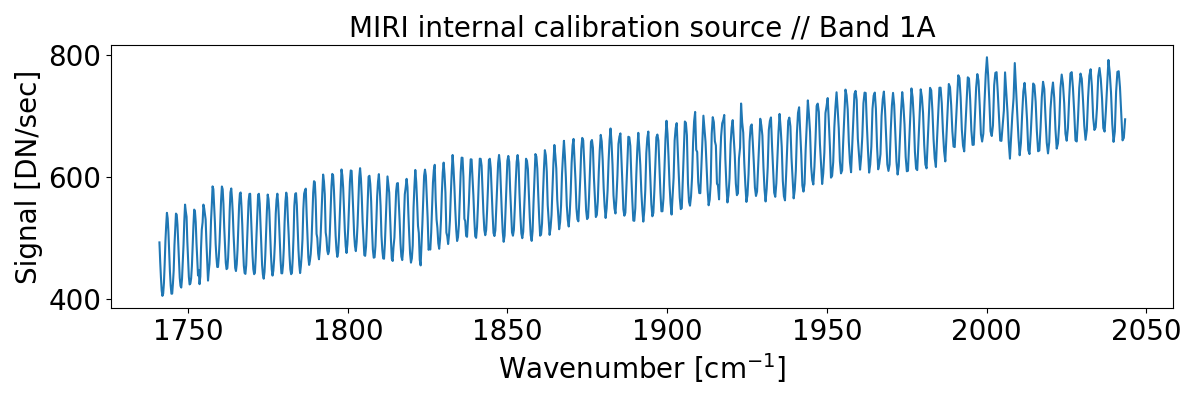

<IPython.core.display.Javascript object>


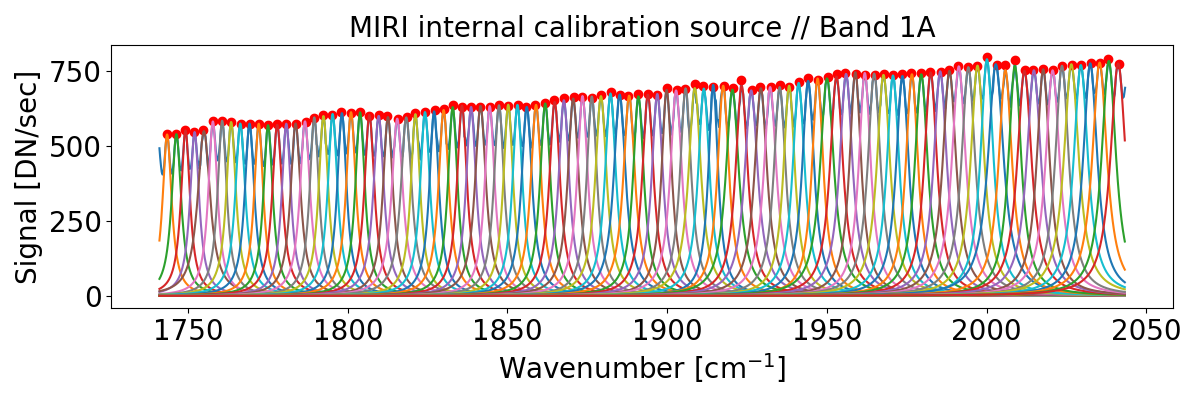

<IPython.core.display.Javascript object>


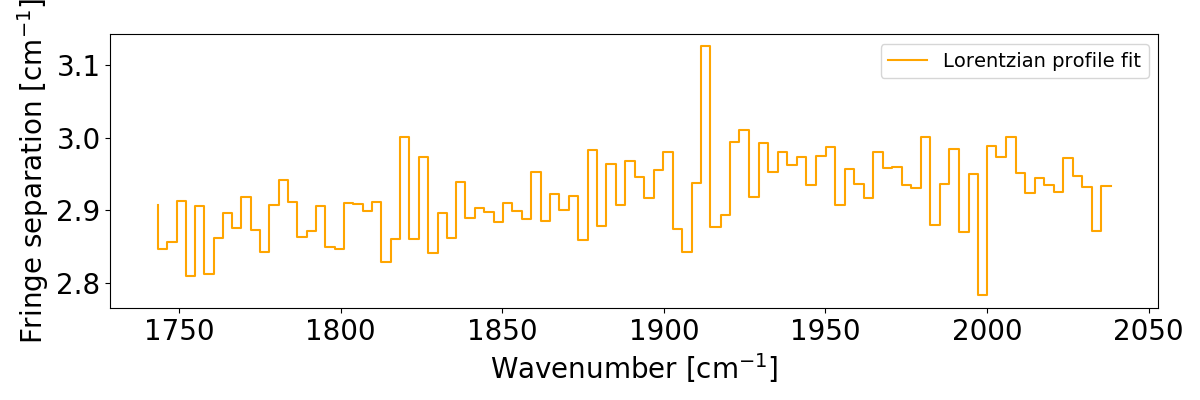

<IPython.core.display.Javascript object>


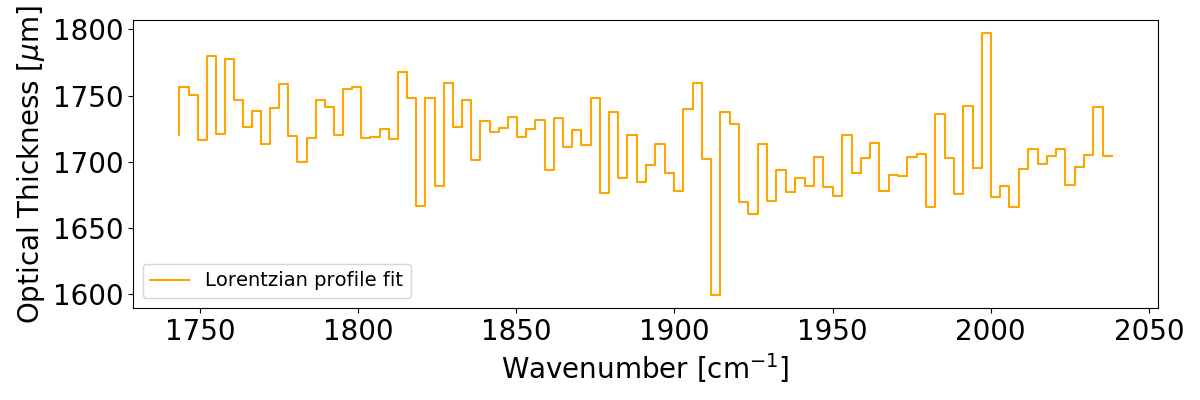

<IPython.core.display.Javascript object>


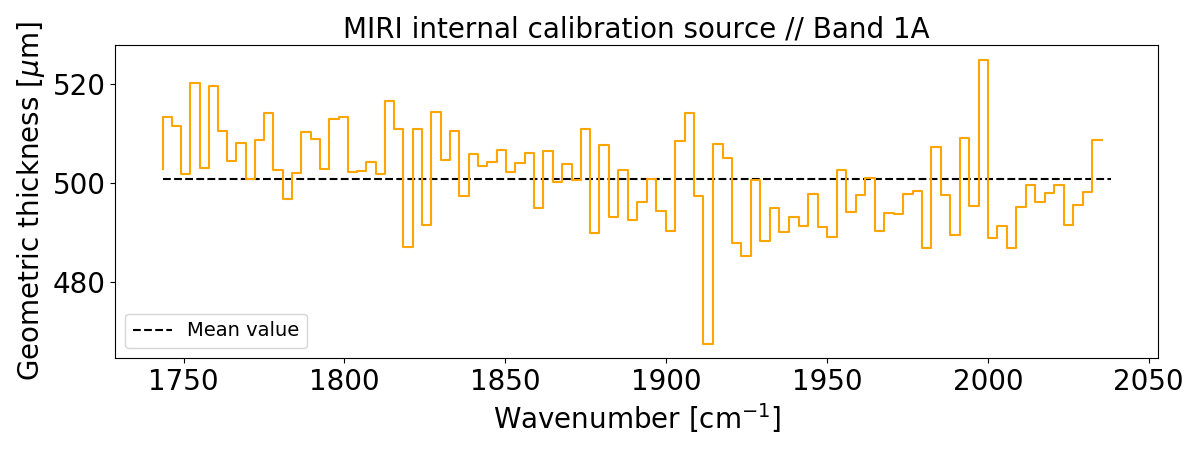

/Users/ioannisa/anaconda2/envs/miricle.20170307/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [3]:
plt.ion()
plt.close('all')
for band in ['1A']: #  ,'1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C'
    intcal_source_sci = mrsobs.MIRI_internal_calibration_source(lvl2path,band,campaign='FM')
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_RAD_06_raster(lvl2path,band)
    semiext_source_sci,semiext_source_bkg = mrsobs.OTIS_ASPA_semiextended_source(otisdatapath,band,pointing='v03')
        
    
    d2cMaps   = funcs.load_obj('d2cMaps_band{}_tr80pc'.format(band),path=d2cMapDir)
    lambdaMap = d2cMaps['lambdaMap']
    nslices   = d2cMaps['nslices']
    
    if band[0] in ['3','4']:
        lambdaMap = np.flipud(lambdaMap)
        intcal_source_sci = np.flipud(intcal_source_sci)
    
    # perform transform
    point_source_bkgsubtr   = point_source_sci-point_source_bkg
    semiext_source_bkgsubtr = semiext_source_sci-semiext_source_bkg
    
    
    #-- isoalpha
    ypos,xpos =  funcs.detpixel_trace(band,d2cMaps,sliceID=nslices/2,alpha_pos=0.)
    #-- point source
    ypos_p,xpos_p   = funcs.detpixel_trace_compactsource(point_source_bkgsubtr,band,d2cMaps)
    #-- semi-extended source
    ypos_se,xpos_se = funcs.detpixel_trace_compactsource(semiext_source_bkgsubtr,band,d2cMaps)
    
    if band == '1A':
        ypos,xpos = ypos_se,xpos_se
    elif band == '1B':
        ypos,xpos = ypos_p,xpos_p
    elif band == '1C':
        ypos,xpos = ypos_se,xpos_se      
    else:
        ypos,xpos = ypos,xpos
    ypos,xpos = ypos[20:-20],xpos[20:-20]
    
    if band == '1A':
        thres=0.3 
        min_dist=6
    elif band == '1B':
        thres=0.3 
        min_dist=7
    elif band == '1C':
        thres=0.3 
        min_dist=8
    elif band == '2A':
        thres=0.3 
        min_dist=9
    elif band == '2B':
        thres=0.3 
        min_dist=10
    elif band == '2C':
        thres=0.1
        min_dist=13
    elif band == '3A':
        thres=0.1
        min_dist=18
    elif band == '3B':
        thres=0.1
        min_dist=21
    elif band == '3C':
        thres=0.1
        min_dist=24
    elif band == '4A':
        thres=0.1
        min_dist=29
    elif band == '4B':
        thres=0.1
        min_dist=32
    elif band == '4C':
        thres=0.1
        min_dist=32
    if band[0] in ['3','4']:
        if band == '3A':
            sigma = 2
        elif band == '3B':
            sigma = 3
        elif band == '3C':
            sigma = 3
        elif band[0] == '4':
            sigma=5
        from scipy.ndimage import gaussian_filter1d
        spec_signal = gaussian_filter1d(intcal_source_sci[ypos,xpos],sigma)
    else:
        spec_signal = intcal_source_sci[ypos,xpos]
    ext_source_norm = funcs.norm_fringe(np.flipud(spec_signal), thres=thres, min_dist=min_dist)
    ext_source_norm_neg = funcs.norm_fringe(np.flipud(-spec_signal), thres=0., min_dist=min_dist)
    
    plt.figure(figsize=(12,4))
    plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(intcal_source_sci[ypos,xpos]))
    if band[0] in ['3','4']:
        plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(spec_signal))
        plt.plot(np.flipud(10000./lambdaMap[ypos,xpos])[ext_source_norm[1]],np.flipud(spec_signal)[ext_source_norm[1]],'ro')
    plt.title('MIRI internal calibration source // Band {}'.format(band))
    plt.xlabel(r'Wavenumber [cm$^{-1}$]')
    plt.ylabel('Signal [DN/sec]')
    if  band == '4C':
        plt.hlines(0,10000./lambdaMap[np.nonzero(lambdaMap)].min(),10000./lambdaMap[np.nonzero(lambdaMap)].max(),'k',alpha=0.4,linestyle='dashed')
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavenumber.eps'.format(band), format='eps', dpi=100)
    
    from scipy.optimize import curve_fit
    # Compute zeroth order optical thickness of detector from fringe peak separation
    fringepeaks_wavenumber = np.flipud(10000./lambdaMap[ypos,xpos])[ext_source_norm[1]]       # cm-1
    # Compute first order optical thickness of detector from fitting Lorentzian profiles to the fringe peaks
    wvnrs = np.flipud(10000./lambdaMap[ypos,xpos])
    wvnr_arr = np.arange(wvnrs[0],wvnrs[-1],0.1)
    sig_arr = np.flipud(spec_signal)
    sig_arr[np.isnan(sig_arr)] = 0
    peaks = ext_source_norm[1]

    plt.figure(figsize=(12,4))
    plt.plot(wvnrs,sig_arr)
    plt.plot(wvnrs[peaks],sig_arr[peaks],'ro')
    mu = np.zeros(len(peaks))
    for i,peak in enumerate(peaks): 
        amp = sig_arr[peak]
        mean = wvnrs[peak]
        sigma = 2*(wvnrs[peak+1] - wvnrs[peak])
        
        if band[0] == '1':
            popt,pcov = curve_fit(funcs.lorentzian_profile,wvnrs[peak-2:peak+3],sig_arr[peak-2:peak+3],p0=[amp,mean,sigma],absolute_sigma=True,bounds=([0,0,0],[np.inf,np.inf,np.inf]))
            plt.plot(wvnr_arr,funcs.lorentzian_profile(wvnr_arr,*popt))
            mu[i] = popt[1]
        elif band[0] == '4':
            mu[i] = mean
        else:
            if peak> len(sig_arr)-6:
                continue
            if peak<6:
                continue  
            try:
                popt,pcov = curve_fit(funcs.lorentzian_profile,wvnrs[peak-6:peak+6],sig_arr[peak-6:peak+6],p0=[amp,mean,sigma],absolute_sigma=True,bounds=([0,0,0],[np.inf,np.inf,np.inf]))
                plt.plot(wvnr_arr,funcs.lorentzian_profile(wvnr_arr,*popt))
                mu[i] = popt[1]
            except:
                mu[i] = mean
    plt.title('MIRI internal calibration source // Band {}'.format(band))
    plt.xlabel(r'Wavenumber [cm$^{-1}$]')
    plt.ylabel('Signal [DN/sec]')
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavenumber_peaks.eps'.format(band), format='eps', dpi=100)
    
    plt.figure(figsize=(12,4))
#     plt.step(fringepeaks_wavenumber[:-1],np.diff(fringepeaks_wavenumber),'b',label='Detector sampling')
    plt.step(mu[:-1],np.diff(mu),'orange',label='Lorentzian profile fit')
    plt.xlabel(r'Wavenumber [cm$^{-1}$]')
    plt.ylabel(r'Fringe separation [cm$^{-1}$]')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavenumber_FringeSeparation.eps'.format(band), format='eps', dpi=100)

    plt.figure(figsize=(12,4))
#     plt.step(fringepeaks_wavenumber[:-1],10000./(2*np.diff(fringepeaks_wavenumber)),'b',label='Detector sampling')
    plt.step(mu[:-1],10000./(2*np.diff(mu)),'orange',label='Lorentzian profile fit')
    plt.xlabel(r'Wavenumber [cm$^{-1}$]')
    plt.ylabel(r'Optical Thickness [$\mu$m]')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavenumber_OpticalThickness.eps'.format(band), format='eps', dpi=100)

    plt.figure(figsize=(12,4.5))
#     plt.step(fringepeaks_wavenumber[:-1],(10000./(2*np.diff(fringepeaks_wavenumber)))/funcs.indexOfRefractionSi(10000./fringepeaks_wavenumber[:-1]),'b',label='Detector sampling')
    if band in ['3B','3C']:
        sel = (np.real((10000./(2*np.diff(mu)))/funcs.indexOfRefractionSi(10000./mu[:-1]))>350) & (np.real((10000./(2*np.diff(mu)))/funcs.indexOfRefractionSi(10000./mu[:-1]))<500)
#         plt.step(mu[:-2],((10000./(2*np.diff(mu[:-1])))/funcs.indexOfRefractionSi(10000./mu[:-2])),'k',alpha=0.4)
        geo_thickness = (10000./(2*np.diff(mu[:-1])))/funcs.indexOfRefractionSi(10000./mu[:-2])
        plt.step(mu[:-2][(geo_thickness>350)&(geo_thickness<500)],geo_thickness[(geo_thickness>350)&(geo_thickness<500)],'orange')
        plt.hlines(np.mean(np.real((10000./(2*np.diff(mu)))/funcs.indexOfRefractionSi(10000./mu[:-1]))[sel]),mu[:-1].min(),mu[:-1].max(),'k',linestyle='dashed',label='Mean value')
    else:
        plt.step(mu[:-2],(10000./(2*np.diff(mu[:-1])))/funcs.indexOfRefractionSi(10000./mu[:-2]),'orange')
        plt.hlines(np.mean(np.real((10000./(2*np.diff(mu)))/funcs.indexOfRefractionSi(10000./mu[:-1]))),mu[:-1].min(),mu[:-1].max(),'k',linestyle='dashed',label='Mean value')
    plt.xlabel(r'Wavenumber [cm$^{-1}$]')
    plt.ylabel(r'Geometric thickness [$\mu$m]')
    plt.title('MIRI internal calibration source // Band {}'.format(band))
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavenumber_GeometricThickness.eps'.format(band), format='eps', dpi=100)

<IPython.core.display.Javascript object>


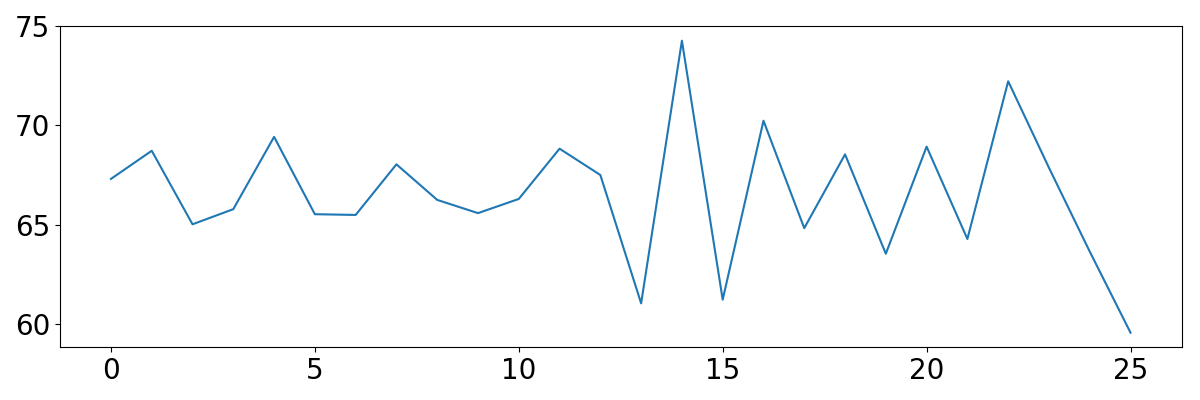

In [9]:
_wav_ = np.genfromtxt("/Users/ioannisa/Desktop/python/miri_devel/transp_contact_transm_1e15implant_poly_fringe_peaks.csv", delimiter=",")[:,0]
_wvnr_ = np.flipud(10000./_wav_)

plt.figure(figsize=(12,4))
plt.plot(10000./(2*np.diff(_wvnr_)) )
plt.tight_layout()

<IPython.core.display.Javascript object>


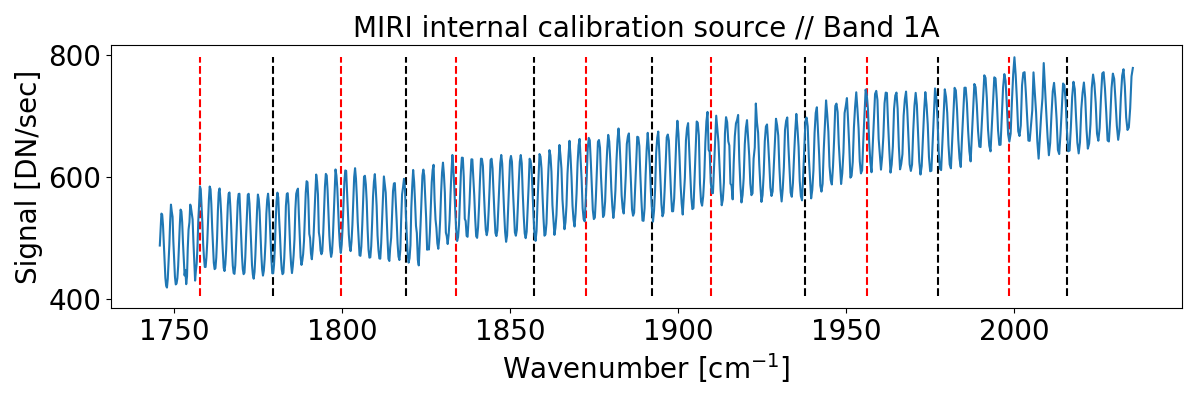

<IPython.core.display.Javascript object>


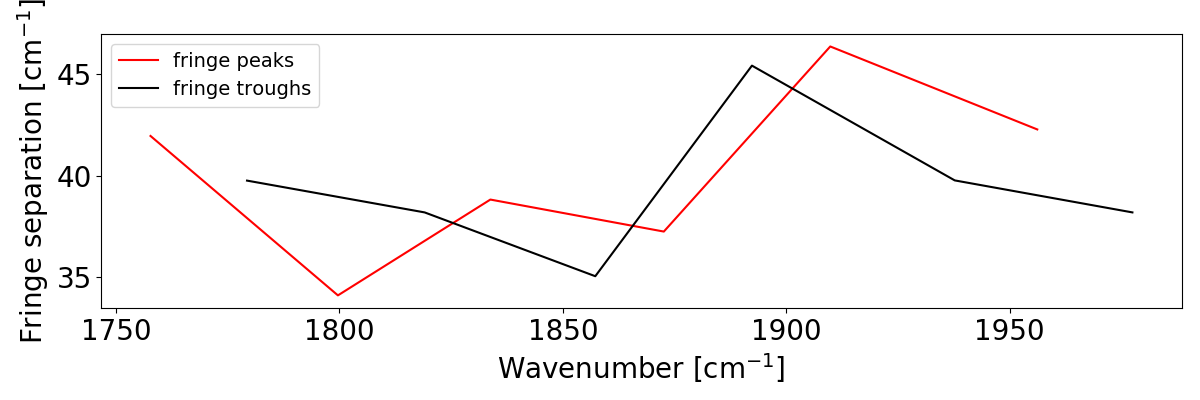

<IPython.core.display.Javascript object>


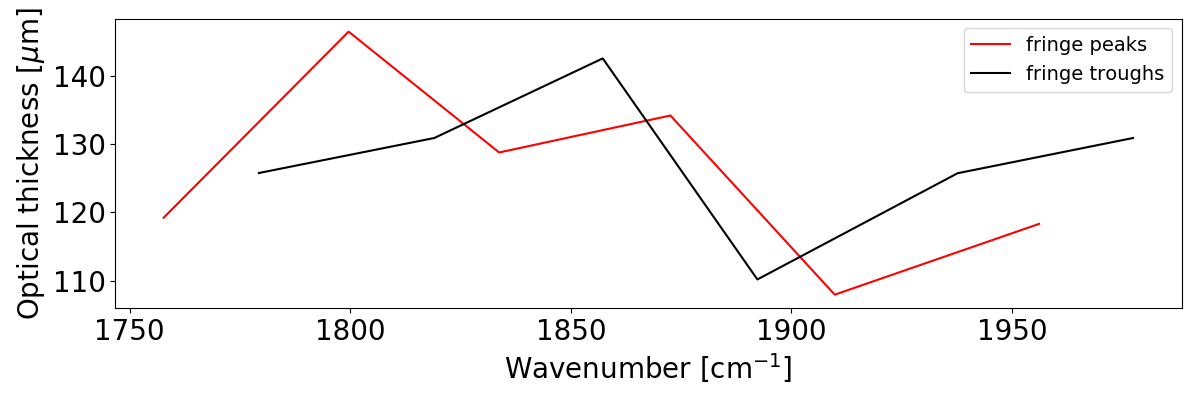

<IPython.core.display.Javascript object>


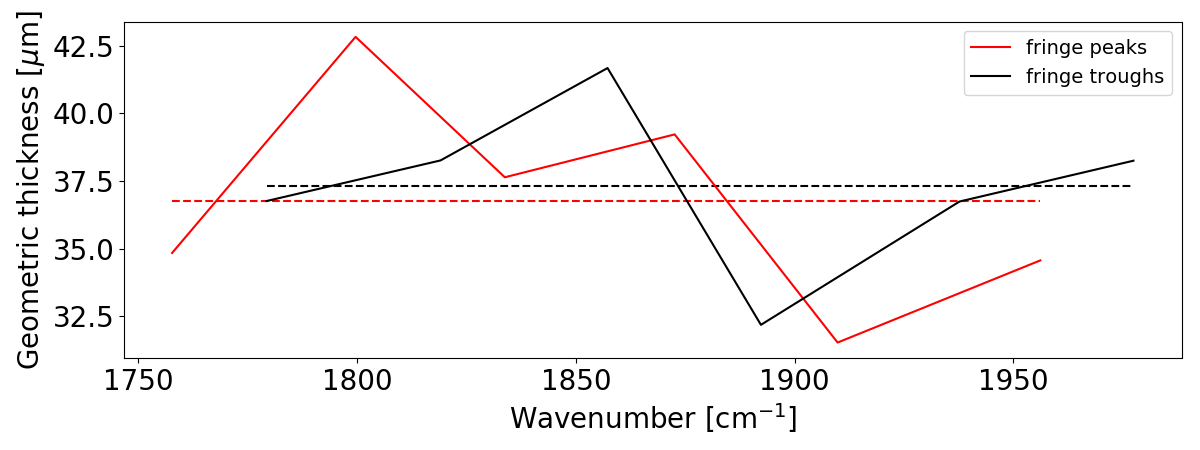

In [4]:
plt.ion()
plt.close('all')
for band in ['1A']: #  ,'1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C'
    intcal_source_sci = mrsobs.MIRI_internal_calibration_source(lvl2path,band,campaign='FM')
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_RAD_06_raster(lvl2path,band)
    semiext_source_sci,semiext_source_bkg = mrsobs.OTIS_ASPA_semiextended_source(otisdatapath,band,pointing='v03')
    
    d2cMaps   = funcs.load_obj('d2cMaps_band{}_tr80pc'.format(band),path=d2cMapDir)
    lambdaMap = d2cMaps['lambdaMap']
    nslices   = d2cMaps['nslices']
    
    # perform transform
    point_source_bkgsubtr   = point_source_sci-point_source_bkg
    semiext_source_bkgsubtr = semiext_source_sci-semiext_source_bkg
    
    #-- isoalpha
    ypos,xpos =  funcs.detpixel_trace(band,d2cMaps,sliceID=nslices/2,alpha_pos=0.)
    #-- point source
    ypos_p,xpos_p   = funcs.detpixel_trace_compactsource(point_source_bkgsubtr,band,d2cMaps)
    #-- semi-extended source
    ypos_se,xpos_se = funcs.detpixel_trace_compactsource(semiext_source_bkgsubtr,band,d2cMaps)
    
    if band == '1A':
        ypos,xpos = ypos_se,xpos_se
    elif band == '1B':
        ypos,xpos = ypos_p,xpos_p
    elif band == '1C':
        ypos,xpos = ypos_se,xpos_se 
    else:
        ypos,xpos = ypos,xpos
    ypos,xpos = ypos[20:-20],xpos[20:-20]
    
    if band == '1A':
        thres=0.3 
        min_dist=6
    elif band == '1B':
        thres=0.3 
        min_dist=8
    elif band == '1C':
        thres=0.3 
        min_dist=8
    elif band == '2A':
        thres=0.3 
        min_dist=9
    elif band == '2B':
        thres=0.3 
        min_dist=10
    elif band == '2C':
        thres=0.1
        min_dist=13
    ext_source_norm = funcs.norm_fringe(np.flipud(intcal_source_sci[ypos,xpos]), thres=thres, min_dist=min_dist)
    ext_source_norm_neg = funcs.norm_fringe(np.flipud(-intcal_source_sci[ypos,xpos]), thres=0., min_dist=min_dist)
    
    plt.figure(figsize=(12,4))
    plt.plot(np.flipud(10000./lambdaMap[ypos,xpos][20:-20]),np.flipud(intcal_source_sci[ypos,xpos][20:-20]))
    if band == '1A':
        vlines_peaks = [1757.71,1799.65,1833.77,1872.59,1909.84,1956.17,1998.43]
        vlines_troughs = [1779.31,1819.06,1857.25,1892.31,1937.7,1977.46,2015.65]
    elif band == '1B':
        vlines_peaks = [1555.8,1598.61,1635.58,1672.8,1711.36,1758.16]
        vlines_troughs = [1530.28,1574.15,1612.18,1652.86,1690.88,1731.57]
    elif band == '1C':
        vlines_peaks = [1378.42,1415.63,1456.95,1490.82,1533.94]
        vlines_troughs = [1393.05,1434.62,1471.06,1508.02]
    elif band == '2A':
        vlines_peaks = [1182.72,1222.22,1265.36,1306.67]
        vlines_troughs = [1163.65,1200.66,1240.61,1283.85,1321.88]
    elif band == '2B':
        vlines_peaks = [1010.32,1053.38,1090.15,1134.98]
        vlines_troughs = [988.107,1026.84,1068.72,1111.78]
    elif band == '2C':
        vlines_peaks = [870.667,906.748,944.19,973.974]
        vlines_troughs = [850.073,893.643,932.617,972.272]
    plt.vlines(vlines_peaks,intcal_source_sci[ypos,xpos][~np.isnan(intcal_source_sci[ypos,xpos])].min(),intcal_source_sci[ypos,xpos][~np.isnan(intcal_source_sci[ypos,xpos])].max(),'r',linestyle='dashed')
    plt.vlines(vlines_troughs,intcal_source_sci[ypos,xpos][~np.isnan(intcal_source_sci[ypos,xpos])].min(),intcal_source_sci[ypos,xpos][~np.isnan(intcal_source_sci[ypos,xpos])].max(),'k',linestyle='dashed')
    plt.title('MIRI internal calibration source // Band {}'.format(band))
    plt.xlabel(r'Wavenumber [cm$^{-1}$]')
    plt.ylabel('Signal [DN/sec]')
    if  band == '4C':
        plt.hlines(0,10000./lambdaMap[np.nonzero(lambdaMap)].min(),10000./lambdaMap[np.nonzero(lambdaMap)].max(),'k',alpha=0.4,linestyle='dashed')
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavenumber_LowFrequencyFringe.eps'.format(band), format='eps', dpi=100)
    
    plt.figure(figsize=(12,4))
    plt.plot(vlines_peaks[:-1],np.diff(np.array(vlines_peaks)),'r',label='fringe peaks')
    plt.plot(vlines_troughs[:-1],np.diff(np.array(vlines_troughs)),'k',label='fringe troughs')
    plt.xlabel(r'Wavenumber [cm$^{-1}$]')
    plt.ylabel('Fringe separation [cm$^{-1}$]')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavenumber_LowFrequencyFringe_FringeSeparation.eps'.format(band), format='eps', dpi=100)
    
    plt.figure(figsize=(12,4))
    plt.plot(vlines_peaks[:-1],10000./(2*np.diff(np.array(vlines_peaks))) , 'r',label='fringe peaks')
    plt.plot(vlines_troughs[:-1],10000./(2*np.diff(np.array(vlines_troughs))) , 'k',label='fringe troughs')
    plt.xlabel(r'Wavenumber [cm$^{-1}$]')
    plt.ylabel('Optical thickness [$\mu$m]')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavenumber_LowFrequencyFringe_OpticalThickness.eps'.format(band), format='eps', dpi=100)
    
    plt.figure(figsize=(12,4.5))
    plt.plot(vlines_peaks[:-1],(10000./(2*np.diff(np.array(vlines_peaks))))/funcs.indexOfRefractionSi(10000./np.array(vlines_peaks[:-1]) ) ,'r',label='fringe peaks')
    plt.hlines(np.mean((10000./(2*np.diff(np.array(vlines_peaks))))/funcs.indexOfRefractionSi(10000./np.array(vlines_peaks[:-1]) )),np.array(vlines_peaks[:-1]).min(),np.array(vlines_peaks[:-1]).max(),'r',linestyle='dashed')
    
    plt.plot(vlines_troughs[:-1],(10000./(2*np.diff(np.array(vlines_troughs))))/funcs.indexOfRefractionSi(10000./np.array(vlines_troughs[:-1]) ) ,'k',label='fringe troughs')
    plt.hlines(np.mean((10000./(2*np.diff(np.array(vlines_troughs))))/funcs.indexOfRefractionSi(10000./np.array(vlines_troughs[:-1]) )),np.array(vlines_troughs[:-1]).min(),np.array(vlines_troughs[:-1]).max(),'k',linestyle='dashed')
    plt.xlabel(r'Wavenumber [cm$^{-1}$]')
    plt.ylabel('Geometric thickness [$\mu$m]')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavenumber_LowFrequencyFringe_GeometricThickness.eps'.format(band), format='eps', dpi=100)
vlines_peaks = [870.667,906.748,944.19,973.974]
vlines_troughs = [850.073,893.643,932.617,972.272]

<IPython.core.display.Javascript object>


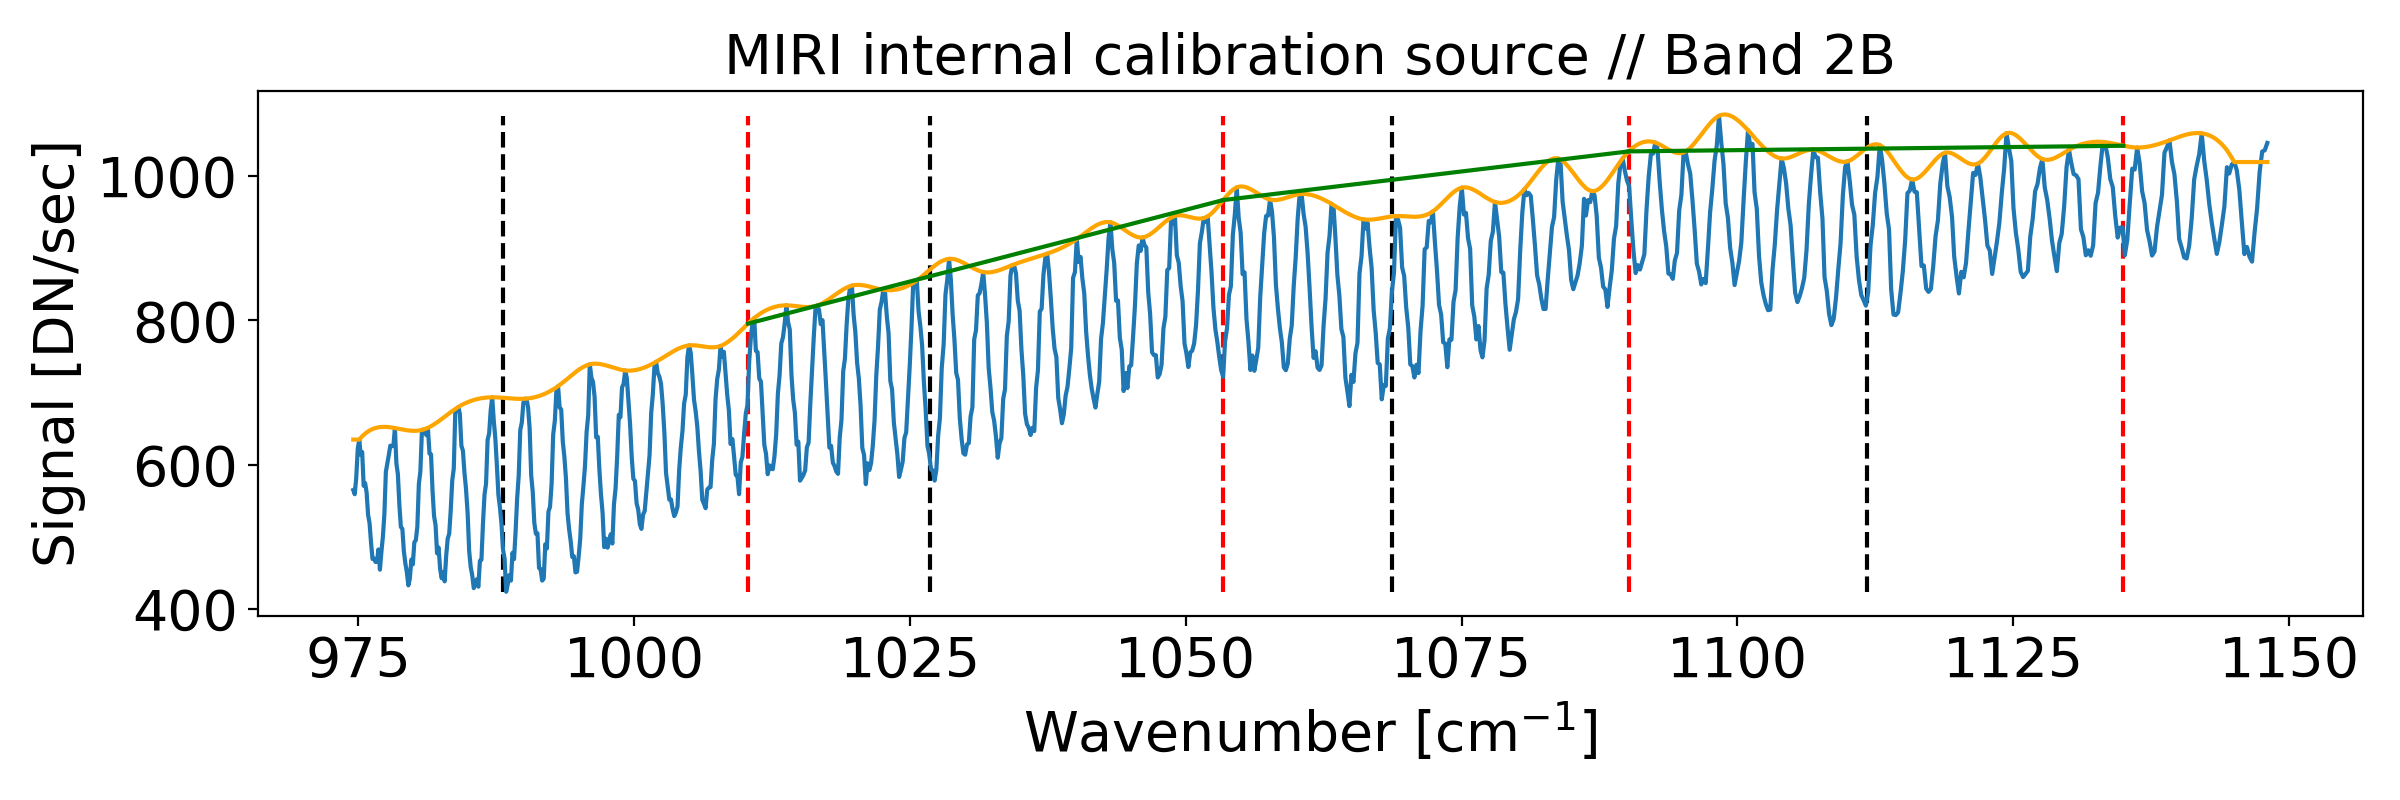

<IPython.core.display.Javascript object>


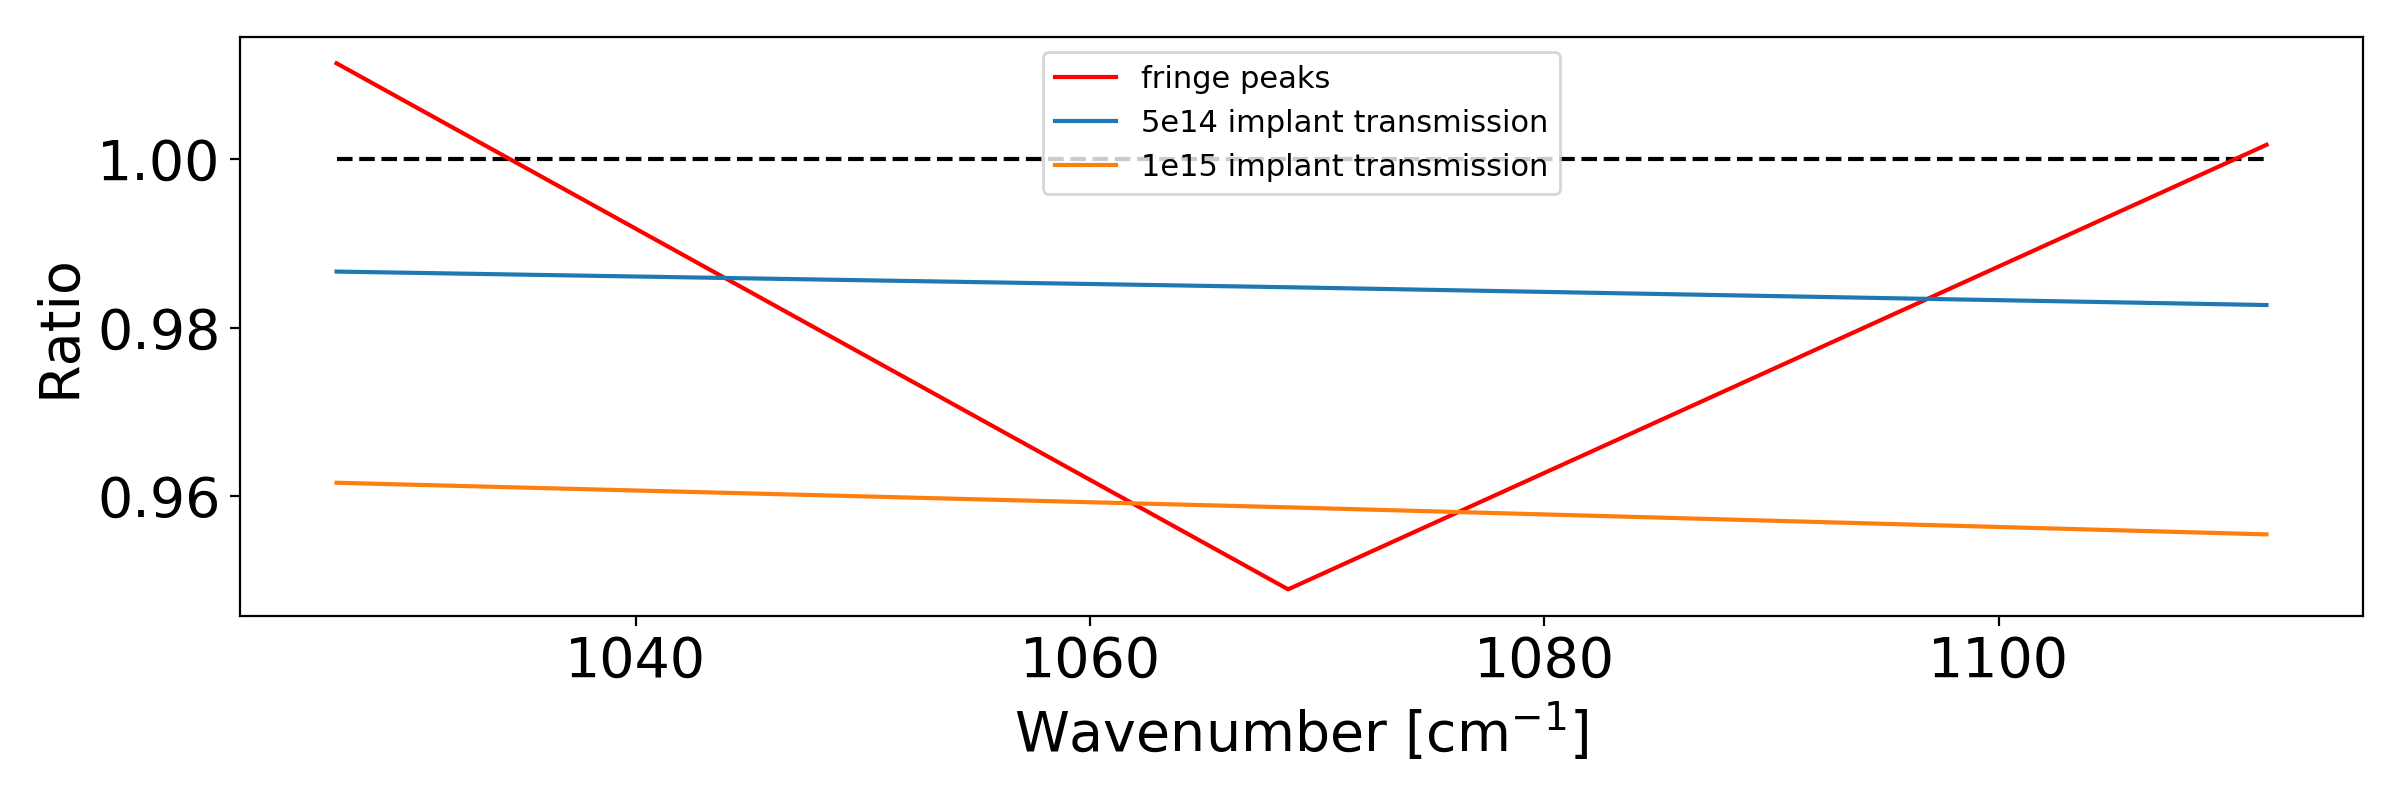

In [31]:
plt.ion()
plt.close('all')
for band in ['2B']: #  ,'1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C'
    intcal_source_sci = mrsobs.MIRI_internal_calibration_source(lvl2path,band,campaign='FM')
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_RAD_06_raster(lvl2path,band)
    semiext_source_sci,semiext_source_bkg = mrsobs.OTIS_ASPA_semiextended_source(otisdatapath,band,pointing='v03')
    
    d2cMaps   = funcs.load_obj('d2cMaps_band{}_tr80pc'.format(band),path=d2cMapDir)
    lambdaMap = d2cMaps['lambdaMap']
    nslices   = d2cMaps['nslices']
    
    # perform transform
    point_source_bkgsubtr   = point_source_sci-point_source_bkg
    semiext_source_bkgsubtr = semiext_source_sci-semiext_source_bkg
    
    #-- isoalpha
    ypos,xpos =  funcs.detpixel_trace(band,d2cMaps,sliceID=nslices/2,alpha_pos=0.)
    #-- point source
    ypos_p,xpos_p   = funcs.detpixel_trace_compactsource(point_source_bkgsubtr,band,d2cMaps)
    #-- semi-extended source
    ypos_se,xpos_se = funcs.detpixel_trace_compactsource(semiext_source_bkgsubtr,band,d2cMaps)
    
    if band == '1A':
        ypos,xpos = ypos_se,xpos_se
    elif band == '1B':
        ypos,xpos = ypos_p,xpos_p+2
    elif band == '1C':
        ypos,xpos = ypos_se,xpos_se 
    else:
        ypos,xpos = ypos,xpos
    ypos,xpos = ypos[20:-20],xpos[20:-20]

    if band == '1A':
        thres=0.3 
        min_dist=6
    elif band == '1B':
        thres=0.3 
        min_dist=8
    elif band == '1C':
        thres=0.3 
        min_dist=8
    elif band == '2A':
        thres=0.3 
        min_dist=9
    elif band == '2B':
        thres=0.3 
        min_dist=10
    elif band == '2C':
        thres=0.1
        min_dist=13
    ext_source_norm = funcs.norm_fringe(np.flipud(intcal_source_sci[ypos,xpos]), thres=thres, min_dist=min_dist)
    ext_source_norm_neg = funcs.norm_fringe(np.flipud(-intcal_source_sci[ypos,xpos]), thres=0., min_dist=min_dist)
    
    plt.figure(figsize=(12,4))
    plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(intcal_source_sci[ypos,xpos]))
    if band == '1A':
        vlines_peaks = [1757.71,1799.65,1833.77,1872.59,1909.84,1956.17,1998.43]
        vlines_troughs = [1779.31,1819.06,1857.25,1892.31,1937.7,1977.46,2015.65]
    elif band == '1B':
        vlines_peaks = [1555.8,1598.61,1635.58,1672.8,1711.36,1758.16]
        vlines_troughs = [1530.28,1574.15,1612.18,1652.86,1690.88,1731.57]
    elif band == '1C':
        vlines_peaks = [1378.42,1415.63,1456.95,1490.82,1533.94]
        vlines_troughs = [1393.05,1434.62,1471.06,1508.02]
    elif band == '2A':
        vlines_peaks = [1182.72,1222.22,1265.36,1306.67]
        vlines_troughs = [1163.65,1200.66,1240.61,1283.85,1321.88]
    elif band == '2B':
        vlines_peaks = [1010.32,1053.38,1090.15,1134.98]
        vlines_troughs = [988.107,1026.84,1068.72,1111.78]
    elif band == '2C':
        vlines_peaks = [870.667,906.748,944.19,973.974]
        vlines_troughs = [850.073,893.643,932.617,972.272]
    plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),ext_source_norm[2],'orange')
#     plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),-ext_source_norm_neg[2],'orange')
    plt.plot()
    plt.vlines(vlines_peaks,intcal_source_sci[ypos,xpos][~np.isnan(intcal_source_sci[ypos,xpos])].min(),intcal_source_sci[ypos,xpos][~np.isnan(intcal_source_sci[ypos,xpos])].max(),'r',linestyle='dashed')
    plt.vlines(vlines_troughs,intcal_source_sci[ypos,xpos][~np.isnan(intcal_source_sci[ypos,xpos])].min(),intcal_source_sci[ypos,xpos][~np.isnan(intcal_source_sci[ypos,xpos])].max(),'k',linestyle='dashed')
    plt.title('MIRI internal calibration source // Band {}'.format(band))
    plt.xlabel(r'Wavenumber [cm$^{-1}$]')
    plt.ylabel('Signal [DN/sec]')
    if  band == '4C':
        plt.hlines(0,10000./lambdaMap[np.nonzero(lambdaMap)].min(),10000./lambdaMap[np.nonzero(lambdaMap)].max(),'k',alpha=0.4,linestyle='dashed')
    
    from scipy.interpolate import InterpolatedUnivariateSpline
    interp_spec = InterpolatedUnivariateSpline(np.flipud(10000./lambdaMap[ypos,xpos]),ext_source_norm[2],k=3,ext=3)
    vlines_peaks = np.array(vlines_peaks)
    vlines_troughs = np.array(vlines_troughs)
    
    percent_diff = np.zeros(len(vlines_peaks)-1)
    at_wvnr = np.zeros(len(vlines_peaks)-1)
    for i in range(len(vlines_peaks)-1):
#         print interp_spec(vlines_peaks[i]),interp_spec(vlines_peaks[i+1]),interp_spec(vlines_troughs[(vlines_troughs>vlines_peaks[i]) & (vlines_troughs<vlines_peaks[i+1])][0])
        x0,x1 = vlines_peaks[i],vlines_peaks[i+1]
        y0,y1 = interp_spec(vlines_peaks[i]),interp_spec(vlines_peaks[i+1])
        a = (y1-y0)/(x1-x0)
        x = vlines_troughs[(vlines_troughs>vlines_peaks[i]) & (vlines_troughs<vlines_peaks[i+1])][0]
        y = a*(x-x0)+y0
#         plt.plot(x,y,'ro')
#         plt.plot(vlines_peaks[i],interp_spec(vlines_peaks[i]),'go')
        plt.plot([vlines_peaks[i],vlines_peaks[i+1]],[interp_spec(vlines_peaks[i]),interp_spec(vlines_peaks[i+1])],'g')
        at_wvnr[i] = x
        percent_diff[i] = interp_spec(vlines_troughs[(vlines_troughs>vlines_peaks[i]) & (vlines_troughs<vlines_peaks[i+1])][0])/y
        
#     plt.plot(at_wvnr,percent_diff,'r')
    
    interp_spec = InterpolatedUnivariateSpline(np.flipud(10000./lambdaMap[ypos,xpos]),-ext_source_norm_neg[2],k=3,ext=3)
    percent_diff_neg = np.zeros(len(vlines_troughs)-1)
    at_wvnr_neg = np.zeros(len(vlines_troughs)-1)
    for i in range(len(vlines_troughs)-1):
#         print interp_spec(vlines_peaks[i]),interp_spec(vlines_peaks[i+1]),interp_spec(vlines_troughs[(vlines_troughs>vlines_peaks[i]) & (vlines_troughs<vlines_peaks[i+1])][0])
        x0,x1 = vlines_troughs[i],vlines_troughs[i+1]
        y0,y1 = interp_spec(vlines_troughs[i]),interp_spec(vlines_troughs[i+1])
        a = (y1-y0)/(x1-x0)
        x = vlines_peaks[(vlines_peaks>vlines_troughs[i]) & (vlines_peaks<vlines_troughs[i+1])][0]
        y = a*(x-x0)+y0
#         plt.plot(x,y,'ro')
#         plt.plot([vlines_troughs[i],vlines_troughs[i+1]],[interp_spec(vlines_troughs[i]),interp_spec(vlines_troughs[i+1])],'g')
        at_wvnr_neg[i] = x
        percent_diff_neg[i] = y/interp_spec(vlines_peaks[(vlines_peaks>vlines_troughs[i]) & (vlines_peaks<vlines_troughs[i+1])][0])
        
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavenumber_LowFrequencyFringe_ConnectedPeaksTroughs.eps'.format(band), format='eps', dpi=100)        

    plt.figure(figsize=(12,4))
    plt.plot(at_wvnr,percent_diff,'r',label='fringe peaks')
#     plt.plot(at_wvnr_neg,percent_diff_neg,'k',label='fringe troughs')
    plt.plot(at_wvnr,funcs.buriedelectrode_transmission(workDir,np.flipud(10000./at_wvnr),concentration='5e14'),label='5e14 implant transmission')
    plt.plot(at_wvnr,funcs.buriedelectrode_transmission(workDir,np.flipud(10000./at_wvnr),concentration='1e15'),label='1e15 implant transmission')
    plt.hlines(1,at_wvnr[0],at_wvnr[-1],'k',linestyle='dashed')
    plt.xlabel(r'Wavenumber [cm$^{-1}$]')
    plt.ylabel('Ratio')
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.savefig('figures/MRS_fringes_band{}_VsWavenumber_LowFrequencyFringe_Peak2Peak.eps'.format(band), format='eps', dpi=100)
    

<IPython.core.display.Javascript object>


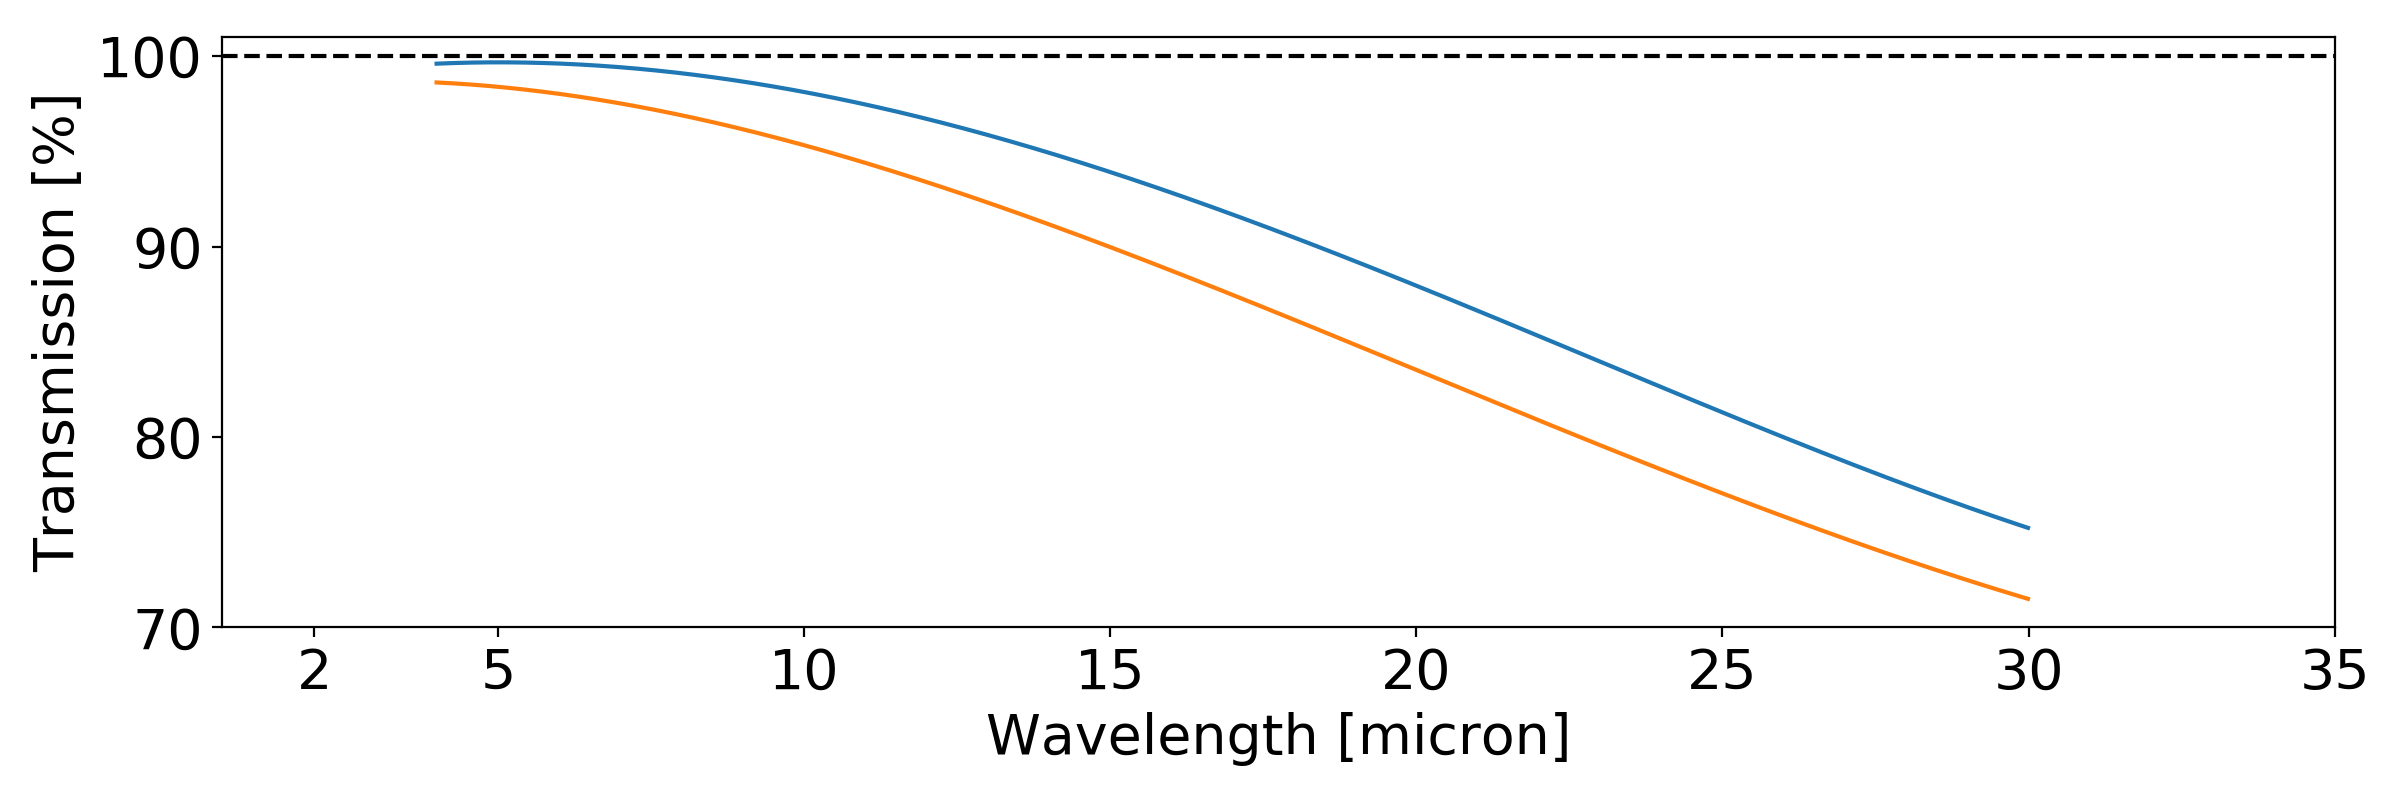

In [8]:
transmission = funcs.buriedelectrode_transmission(workDir,np.arange(4,30,0.01),concentration='5e14')
transmission2 = funcs.buriedelectrode_transmission(workDir,np.arange(4,30,0.01),concentration='1e15')

# Buried contact
plt.figure(figsize=(12,4))
plt.plot(np.arange(4,30,0.01),transmission*100.)
plt.plot(np.arange(4,30,0.01),transmission2*100.)
plt.ylim(70,101)
plt.xticks([2,5,10,15,20,25,30,35])
plt.hlines([0,100],0.5,35,linestyle='dashed')
plt.xlim(0.5,35)
plt.xlabel('Wavelength [micron]')
plt.ylabel('Transmission [%]')
plt.tight_layout()